In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fz = 102.0
df = 1
da = 0.1
dphi = 1.047
fref = 100.0
N = int((1024.0) * 4*8.0)+1
freqs = np.linspace(0., 1024., N)

In [3]:
dpsi = 0.5 * (np.tanh((freqs - fz)/df) - np.tanh((fref - fz)/df))*dphi
damp = np.exp(0.5*da*((np.tanh((freqs - fz)/df))**2 - (np.tanh((fref - fz)/df))**2))
corr = damp*(2.0 + 1j*dpsi) / (2.0 - 1j*dpsi)

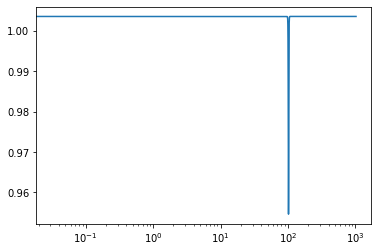

In [4]:
plt.semilogx(freqs, damp)

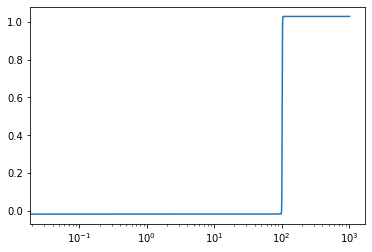

In [5]:
plt.semilogx(freqs, dpsi)

In [6]:
from pycbc.waveform.generator import FDomainCBCGenerator, FDomainDetFrameGenerator

In [7]:
tobs = 8*4
samprate = 4096.
f_low = 10.0
approximant = 'IMRPhenomD'
generator = FDomainDetFrameGenerator(FDomainCBCGenerator, 0., variable_args=['mass1', 'mass2', 'spin1z', 'spin2z',
                                                                             'tc', 'ra', 'dec', 'polarization',
                                                                             'distance'], detectors=['H1', 'L1'],
                                     delta_f=1./tobs, f_lower=f_low, approximant=approximant)

In [8]:
mass1 = 36
mass2 = 29
spin1z = 0.0
spin2z = 0.0
tc = 16.0
ra = 2.37
dec = -1.26
polarization = 2.76
dist = 450.0
dtilde = generator.generate(mass1=mass1, mass2=mass2, spin1z=spin1z, spin2z=spin2z, tc=tc, ra=ra, dec=dec,
                            polarization=polarization, distance=dist)
dmodtilde =  generator.generate(mass1=mass1, mass2=mass2, spin1z=spin1z, spin2z=spin2z, tc=tc, ra=ra, dec=dec,
                            polarization=polarization, distance=dist)

In [9]:
pure_amp = np.abs(dtilde['H1'])
print(freqs)

[0.00000000e+00 3.12500000e-02 6.25000000e-02 ... 1.02393750e+03
 1.02396875e+03 1.02400000e+03]


In [10]:
print(dtilde['H1'].sample_frequencies)

[0.00000000e+00 3.12500000e-02 6.25000000e-02 ... 1.02393750e+03
 1.02396875e+03 1.02400000e+03]


(90, 110)

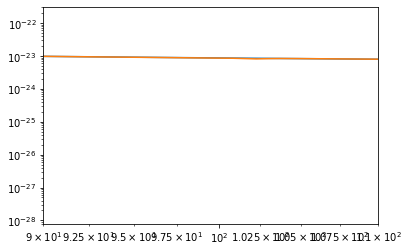

In [11]:
plt.loglog(dtilde['H1'].sample_frequencies, pure_amp)
plt.loglog(dtilde['H1'].sample_frequencies, np.abs(dtilde['H1']*corr))
plt.xlim(90, 110)

In [12]:
from pycbc.waveform.utils import phase_from_frequencyseries

(10.0, 600.0)

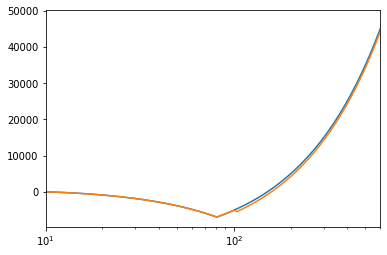

In [13]:
plt.semilogx(dtilde['H1'].sample_frequencies, phase_from_frequencyseries(dtilde['H1']))
plt.semilogx(dtilde['H1'].sample_frequencies, phase_from_frequencyseries(dtilde['H1']*corr))
#
plt.xlim(10., 600.)

(10.0, 600.0)

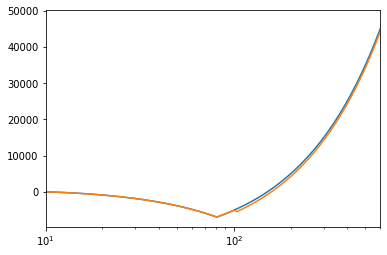

In [14]:
plt.semilogx(dtilde['H1'].sample_frequencies, np.unwrap(np.angle(dtilde['H1'])))
plt.semilogx(dtilde['H1'].sample_frequencies, np.unwrap(np.angle(dtilde['H1']*corr)))
plt.xlim(10., 600.)

In [15]:
dmod = dtilde['H1'].copy()
dmod._data *= corr

In [16]:
print((np.abs(dtilde['H1'].at_frequency(102)) - np.abs(dmod.at_frequency(102))) / np.abs(dtilde['H1'].at_frequency(102)))

0.04540437620761612


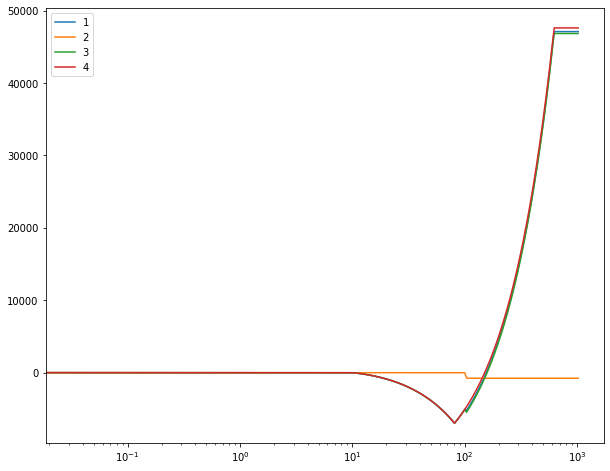

In [17]:
plt.figure(figsize=(10,8))
plt.semilogx(dtilde['H1'].sample_frequencies, phase_from_frequencyseries(dmod - dtilde['H1']), label='1')
plt.semilogx(dtilde['H1'].sample_frequencies, phase_from_frequencyseries(dmod) - phase_from_frequencyseries(dtilde['H1']), label='2')
plt.semilogx(dtilde['H1'].sample_frequencies, phase_from_frequencyseries(dmod), label='3')
plt.semilogx(dtilde['H1'].sample_frequencies, phase_from_frequencyseries(dtilde['H1']), label='4')
plt.legend()


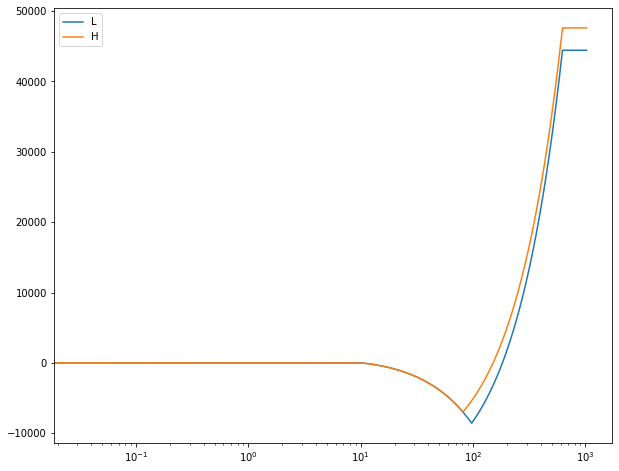

In [18]:
plt.figure(figsize=(10,8))
plt.semilogx(dtilde['L1'].sample_frequencies, phase_from_frequencyseries(dtilde['L1']), label='L')
plt.semilogx(dtilde['H1'].sample_frequencies, phase_from_frequencyseries(dtilde['H1']), label='H')
plt.legend()

In [19]:
dmodtilde['H1']._data *= corr
dmodtilde['L1']._data *= corr

In [20]:
no_phase = np.ones_like(dmodtilde['H1'], dtype=np.complex)
mod_phase = no_phase*corr

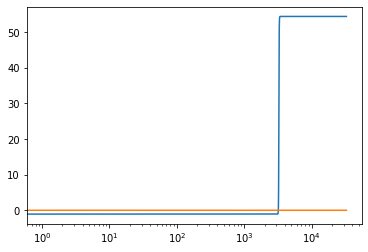

In [21]:
plt.semilogx(np.unwrap(np.angle(mod_phase))*180/np.pi)
plt.semilogx(np.unwrap(np.angle(no_phase))*180/np.pi)

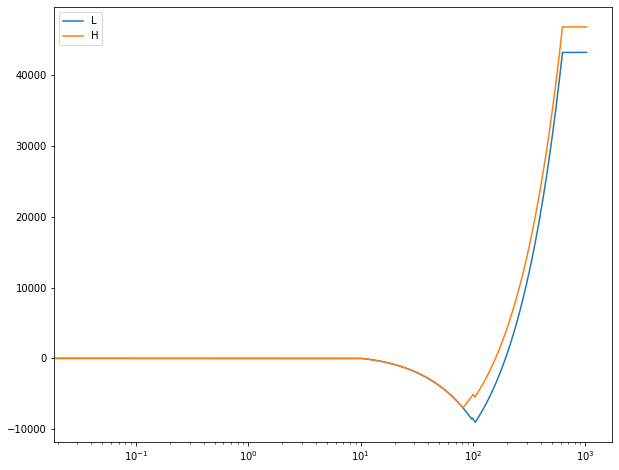

In [22]:
plt.figure(figsize=(10,8))
plt.semilogx(dmodtilde['L1'].sample_frequencies, phase_from_frequencyseries(dmodtilde['L1']), label='L')
plt.semilogx(dmodtilde['H1'].sample_frequencies, phase_from_frequencyseries(dmodtilde['H1']), label='H')
plt.legend()

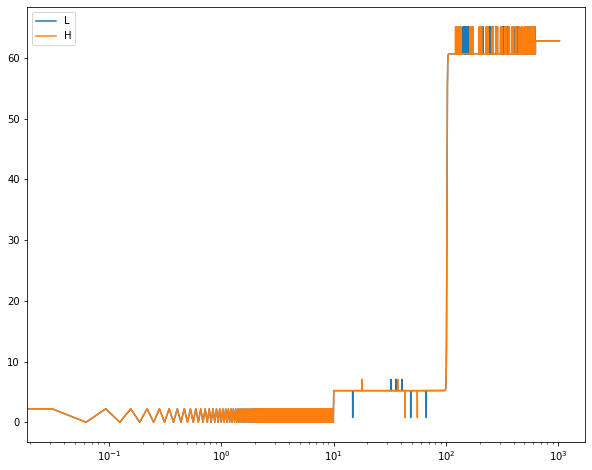

In [23]:
plt.figure(figsize=(10,8))
plt.semilogx(dmodtilde['L1'].sample_frequencies, np.unwrap(np.angle(dmodtilde['L1'], deg=True)) - np.unwrap(np.angle(dtilde['L1'], deg=True)), label='L')
plt.semilogx(dmodtilde['H1'].sample_frequencies, np.unwrap(np.angle(dmodtilde['H1'], deg=True)) - np.unwrap(np.angle(dtilde['H1'], deg=True)), label='H')
plt.legend()


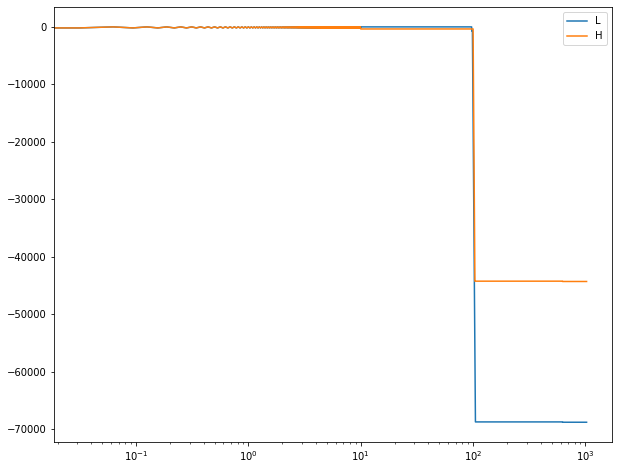

In [24]:
plt.figure(figsize=(10,8))
plt.semilogx(dmodtilde['L1'].sample_frequencies, phase_from_frequencyseries(dmodtilde['L1'])*180/np.pi - phase_from_frequencyseries(dtilde['L1'])*180/np.pi, label='L')
plt.semilogx(dmodtilde['H1'].sample_frequencies, phase_from_frequencyseries(dmodtilde['H1'])*180/np.pi - phase_from_frequencyseries(dtilde['H1'])*180/np.pi, label='H')
plt.legend()